## 파이썬 고급
# Numpy 기본
- Iris 데이터를 파이썬 기본 기능만으로 읽어온다.
- Iris 데이터를 Numpy 기능으로 읽어온다.
- Numpy 어레이(array) 구조를 이해한다.
- Iris 데이터를 그래프로 그려본다.

### 파일 다루기

In [7]:
f = open('숫자.txt')
f.readline()
f.readline()
line = f.readline()
f.close()

print(line)

셋



In [9]:
import numpy as np

### Iris 데이터 읽어오기(1)
- 파이썬 기본 기능만을 가지고 읽어와 보자.

In [10]:
f = open('iris.csv')

f.readline() # 첫번째 줄(헤더) 읽기

data = []
for line in f:
    l = line.strip().split(',') # 개행문자를 없애고, 쉼표로 분리하여 리스트를 얻음
    
    # 문자로 된 숫자들을 실수로 변환한다
    l[0] = float(l[0])
    l[1] = float(l[1])
    l[2] = float(l[2])
    l[3] = float(l[3])

    # 품종 3가지를 숫자로 바꾸어 준다
    if l[4] == 'Iris-setosa':
        l[4] = 0
    elif l[4] == 'Iris-versicolor':
        l[4] = 1
    else:
        l[4] = 2

    data.append(l)

f.close()

# Numpy array 로 변환한다
iris = np.array(data)

In [11]:
iris

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [8]:
iris.shape # 150X5 테이블 형태

(150, 5)

In [6]:
iris.dtype # 실수형

dtype('float64')

In [7]:
iris.ndim # 2차원

2

- Numpy 의 인덱싱

In [8]:
iris[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

In [9]:
iris[:,4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### Iris 데이터 읽어오기(2)

In [22]:
f = open('iris.csv')

# 첫 줄에 있는 속성 이름들을 저장해 놓은다
line = f.readline()
iris_features = line.strip().split(',')[:4] # ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

iris_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

data = []
for line in f:
    l = line.strip().split(',')
    
    l[:4] = [float(i) for i in l[:4]]

    l[4] = iris_labels.index(l[4]) # index() 함수는 해당 값의 인덱스 번호를 알려준다
    
    data.append(l)

f.close()

iris = np.array(data)

In [11]:
iris.shape

(150, 5)

In [13]:
iris_features

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [14]:
iris[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

### Iris 데이터 읽어오기(3)
- Numpy 함수인 loadtxt() 함수를 이용하자.

In [1]:
import numpy as np

iris_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',',
                  converters={4: lambda s: iris_labels.index(s.decode())})

# iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',',
#                   converters={4: lambda s: labels.index(s)}, encoding='utf-8') # latin1, ascii, utf-8, cp949

In [2]:
help(np.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes')
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
       

In [3]:
help(list.index)

Help on method_descriptor:

index(...)
    L.index(value, [start, [stop]]) -> integer -- return first index of value.
    Raises ValueError if the value is not present.



In [5]:
iris

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [4]:
type(iris), len(iris)

(numpy.ndarray, 150)

In [5]:
display(type(iris), iris.shape, iris.dtype, len(iris), iris[0], len(iris[0]))

numpy.ndarray

(150, 5)

dtype('float64')

150

array([5.1, 3.5, 1.4, 0.2, 0. ])

5

### 행(샘플, 레코드) 읽기

In [27]:
iris[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

In [28]:
iris[1]

array([4.9, 3. , 1.4, 0.2, 0. ])

In [29]:
iris[149]

array([5.9, 3. , 5.1, 1.8, 2. ])

In [30]:
iris[-1]

array([5.9, 3. , 5.1, 1.8, 2. ])

In [32]:
iris[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [33]:
iris[50:55]

array([[7. , 3.2, 4.7, 1.4, 1. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6.9, 3.1, 4.9, 1.5, 1. ],
       [5.5, 2.3, 4. , 1.3, 1. ],
       [6.5, 2.8, 4.6, 1.5, 1. ]])

In [34]:
iris[-5:]

array([[6.7, 3. , 5.2, 2.3, 2. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [6.5, 3. , 5.2, 2. , 2. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [5.9, 3. , 5.1, 1.8, 2. ]])

In [6]:
# Iris-setosa 에 해당하는 줄들만 뽑아라
setosa = iris[0:50] # iris[:50]
versicolor = iris[50:100]
virginica = iris[100:] # iris[-50:]

In [7]:
versicolor.shape

(50, 5)

### 한 항목 읽기
- 콤마를 기준으로 앞은 **행번호**, 뒤는 **열번호**

In [35]:
iris[0,0]

5.1

In [36]:
iris[50,3]

1.4

In [37]:
iris[0,4], iris[0,-1], iris[-1,0], iris[-1,-1]

(0.0, 0.0, 5.9, 2.0)

### 열(칼럼, 속성) 읽기

In [38]:
iris[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [8]:
iris[:,0].shape

(150,)

In [9]:
iris[:,0].shape[0]

150

In [39]:
iris[:,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [40]:
iris[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

- 일반적으로 데이터 부분을 X 로, 목표값 부분을 y 로 표시한다

In [42]:
X = iris[:,:4]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
X.shape

(150, 4)

In [47]:
y = iris[:,4]
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [48]:
y.shape

(150,)

- 위에서 y.shape 는 (150,) 으로 튜플로 표시되는데, 이것은 항목이 150개인 1차원 데이터를 의미한다

In [ ]:
X = iris[:, :4] # iris[:, :-1]
y = iris[:, 4]  # iris[:, -1]

### 직사각형 잘라내기

In [49]:
iris[48:52,1:3]

array([[3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5]])

In [50]:
iris[:3,:3]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3]])

In [14]:
iris[-3:, -3:]

array([[5.2, 2. , 2. ],
       [5.4, 2.3, 2. ],
       [5.1, 1.8, 2. ]])

### 리스트를 변환

In [14]:
l = [1.,2,3,4,5]
a = np.array(l)
a

array([1., 2., 3., 4., 5.])

In [15]:
a.dtype, a.shape, a.ndim

(dtype('float64'), (5,), 1)

In [16]:
l2 = [True, False, True]
a2 = np.array(l2)
a2

array([ True, False,  True])

In [18]:
a2.sum()

2

In [20]:
### 이것은 하면 안된다!!!
l3 = ['hong', '안녕하세요~~~~', 'dooley']
a3 = np.array(l3)
a3

array(['hong', '안녕하세요~~~~', 'dooley'], dtype='<U9')

In [22]:
l = [[[1,11],[2,22]],
     [[3,33],[4,44]],
     [[5,55],[6,66]]]
a = np.array(l)
a.shape

(3, 2, 2)

In [24]:
a = np.array([[[1]], [[2]]])
a.shape

(2, 1, 1)

In [25]:
a = np.array([[[1], [2]]])
a.shape

(1, 2, 1)

### 형 지정

In [28]:
np.array([1,2,3], dtype='float')

array([1., 2., 3.])

In [30]:
a = np.array([1.1,2.2,3.3], dtype='int')

In [31]:
display(a, a.dtype)

array([1, 2, 3])

dtype('int32')

In [36]:
a = np.array([0,1.1,2.2,3.3,-1], dtype='bool')

In [37]:
display(a, a.dtype)

array([False,  True,  True,  True,  True])

dtype('bool')

In [38]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [39]:
b = a.astype(float)
b

array([1., 2., 3.])

In [40]:
a

array([1, 2, 3])

In [41]:
# astype() 보다는 array() 를 사용하자.
b = np.array(a, dtype=float)
b

array([1., 2., 3.])

### arange() 함수
- reshape()

In [43]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [44]:
a.shape

(100,)

In [45]:
a.reshape(10,10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [46]:
np.arange(100).reshape(5,20)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [47]:
a = np.arange(100)
b = a.reshape(10,10)
b[0,0] = 99999
a # 원본도 바뀐다

array([99999,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99])

In [52]:
np.arange(100).reshape(2,5,10)

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

       [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

### 사칙연산

In [55]:
a = np.array([1,2,3])
b = np.array([3., 2., 1.])

In [56]:
((a-3)*2 - 3/(a+2*b))%5

array([0.57142857, 2.5       , 4.4       ])

In [69]:
k = a+1
k[0,0]=-1
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [58]:
a%2

array([1, 0, 1], dtype=int32)

In [59]:
a/b

array([0.33333333, 1.        , 3.        ])

In [70]:
a = np.arange(100).reshape(10,10)
m = a.sum()/100
a - m

array([[-49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5,
        -40.5],
       [-39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5,
        -30.5],
       [-29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5,
        -20.5],
       [-19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5,
        -10.5],
       [ -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,
         -0.5],
       [  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5],
       [ 10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,
         19.5],
       [ 20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,
         29.5],
       [ 30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,
         39.5],
       [ 40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,
         49.5]])

In [76]:
a = np.arange(100).reshape(10,10)
a_norm = (a - a.mean())/a.std()
a_norm

array([[-1.71481604, -1.68017329, -1.64553055, -1.6108878 , -1.57624505,
        -1.5416023 , -1.50695955, -1.4723168 , -1.43767406, -1.40303131],
       [-1.36838856, -1.33374581, -1.29910306, -1.26446031, -1.22981757,
        -1.19517482, -1.16053207, -1.12588932, -1.09124657, -1.05660382],
       [-1.02196108, -0.98731833, -0.95267558, -0.91803283, -0.88339008,
        -0.84874733, -0.81410459, -0.77946184, -0.74481909, -0.71017634],
       [-0.67553359, -0.64089084, -0.6062481 , -0.57160535, -0.5369626 ,
        -0.50231985, -0.4676771 , -0.43303435, -0.39839161, -0.36374886],
       [-0.32910611, -0.29446336, -0.25982061, -0.22517786, -0.19053512,
        -0.15589237, -0.12124962, -0.08660687, -0.05196412, -0.01732137],
       [ 0.01732137,  0.05196412,  0.08660687,  0.12124962,  0.15589237,
         0.19053512,  0.22517786,  0.25982061,  0.29446336,  0.32910611],
       [ 0.36374886,  0.39839161,  0.43303435,  0.4676771 ,  0.50231985,
         0.5369626 ,  0.57160535,  0.6062481 

### 어레이의 참조

In [78]:
a = [1,2,3,4,5]
b = a[:]
b

[1, 2, 3, 4, 5]

In [81]:
a = np.array([1,2,3,4,5])
b = a[:]
b[0] = 999
a

array([999,   2,   3,   4,   5])

### 어레이의 값 할당

In [83]:
a[0] = 100
a

array([100,  -1,  -1,  -1,  -1])

In [84]:
a[:] = -1
a

array([-1, -1, -1, -1, -1])

In [85]:
a[:3] = 999

In [86]:
a

array([999, 999, 999,  -1,  -1])

In [89]:
a[:3] = [101,102,103]
a

array([101, 102, 103,  -1,  -1])

In [90]:
a = np.arange(100).reshape(10,10)
# 모든 경계를 -1 로 채워라
a[0] = -1
a[-1] = -1
a[:,0] = -1
a[:,-1] = -1
a

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, 11, 12, 13, 14, 15, 16, 17, 18, -1],
       [-1, 21, 22, 23, 24, 25, 26, 27, 28, -1],
       [-1, 31, 32, 33, 34, 35, 36, 37, 38, -1],
       [-1, 41, 42, 43, 44, 45, 46, 47, 48, -1],
       [-1, 51, 52, 53, 54, 55, 56, 57, 58, -1],
       [-1, 61, 62, 63, 64, 65, 66, 67, 68, -1],
       [-1, 71, 72, 73, 74, 75, 76, 77, 78, -1],
       [-1, 81, 82, 83, 84, 85, 86, 87, 88, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

In [93]:
a = np.arange(100).reshape(10,10)
# 44,45,54,55 값을 -1 로 바꿔라

a[int(10/2)-2:int(10/2)+2, int(10/2)-2:int(10/2)+2] = -1
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, -1, -1, -1, -1, 37, 38, 39],
       [40, 41, 42, -1, -1, -1, -1, 47, 48, 49],
       [50, 51, 52, -1, -1, -1, -1, 57, 58, 59],
       [60, 61, 62, -1, -1, -1, -1, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [95]:
a = np.arange(100).reshape(10,10)
# 대각선만 남기고 나머지는 0
np.eye(10) * a

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 33.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 44.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 66.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 77.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 88.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]])

In [99]:
np.array(np.eye(10)==0, dtype=int)

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])

In [100]:
1- np.eye(10)

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

### 슬라이싱 간격

In [101]:
l = [1,2,3,4,5,6,7,8,9,10]
l[3:7]

[4, 5, 6, 7]

In [102]:
l[3:7:2]

[4, 6]

In [103]:
for i in range(0,10,2):
    print(i)

0
2
4
6
8


In [104]:
l[::2]

[1, 3, 5, 7, 9]

In [105]:
l[::-1]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [106]:
l[::-2]

[10, 8, 6, 4, 2]

In [107]:
sorted([3,4,7,1,2])[::-1]

[7, 4, 3, 2, 1]

- 어레이에도 적용

In [108]:
a = np.arange(100).reshape(10,10)
a[::-1, ::-1]

array([[99, 98, 97, 96, 95, 94, 93, 92, 91, 90],
       [89, 88, 87, 86, 85, 84, 83, 82, 81, 80],
       [79, 78, 77, 76, 75, 74, 73, 72, 71, 70],
       [69, 68, 67, 66, 65, 64, 63, 62, 61, 60],
       [59, 58, 57, 56, 55, 54, 53, 52, 51, 50],
       [49, 48, 47, 46, 45, 44, 43, 42, 41, 40],
       [39, 38, 37, 36, 35, 34, 33, 32, 31, 30],
       [29, 28, 27, 26, 25, 24, 23, 22, 21, 20],
       [19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
       [ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0]])

In [110]:
a = np.arange(100).reshape(10,10)
a[::2, ::2]

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [109]:
a = np.arange(100).reshape(10,10)
a[::-2, ::-2]

array([[99, 97, 95, 93, 91],
       [79, 77, 75, 73, 71],
       [59, 57, 55, 53, 51],
       [39, 37, 35, 33, 31],
       [19, 17, 15, 13, 11]])

In [112]:
a = np.zeros([5,5])
a[:, ::2] = 1
a

array([[1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1.]])

### 조건식

In [60]:
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [61]:
a + 3

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [62]:
a == 1

array([[False,  True, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [64]:
b = (a % 2 == 0)
b

array([[ True, False,  True],
       [False,  True, False],
       [ True, False,  True],
       [False,  True, False]])

In [65]:
a*b

array([[ 0,  0,  2],
       [ 0,  4,  0],
       [ 6,  0,  8],
       [ 0, 10,  0]])

In [66]:
a>5

array([[False, False, False],
       [False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

### 랜덤 생성 맛보기

In [113]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    ==================== =========================================================
    Utility functions
    random_sample        Uniformly distributed floats over ``[0, 1)``.
    random               Alias for `random_sample`.
    bytes                Uniformly distributed random bytes.
    random_integers      Uniformly distributed integers in a given range.
    permutation          Randomly permute a sequence / generate a random sequence.
    shuffle              Randomly permute a sequence in place.
    seed                 Seed the random number generator.
    choice               Random sample from 1-D array.
    
    ==================== =========================================================
    
    ==================== =========================================================
    Compatibility functions
    rand                 Uniformly distributed values.
    randn

In [114]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should all be positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Notes
    -----
    This is a convenience function. If you want an interface that
    takes a shape-tuple as the first argument, refer to
    np.random.random_sample .
    
    Examples
    --------
    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
           [ 0.49313049,  0.94909878]]

In [115]:
np.random.rand(5,5)

array([[0.02696863, 0.95410868, 0.00749256, 0.87506384, 0.36296053],
       [0.64561129, 0.48362734, 0.7807898 , 0.91969276, 0.50225017],
       [0.36745379, 0.81845709, 0.71155736, 0.83788378, 0.93110555],
       [0.09213112, 0.8090773 , 0.35029042, 0.80712109, 0.87300792],
       [0.99577837, 0.50341216, 0.94962638, 0.0483262 , 0.07733593]])

In [116]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

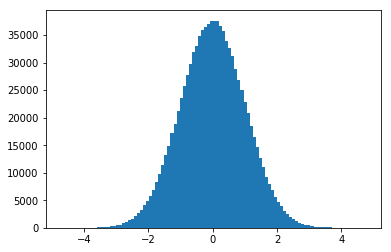

In [127]:
a = np.random.randn(1000000)
plt.hist(a, bins=100)
pass

In [132]:
a<-2

array([False, False, False, ..., False, False, False])

In [131]:
sum(a<-2)/1000000

0.022638

In [ ]:
(a>2) | (a<-2)

### 그래프 그려보기

In [16]:
import matplotlib.pyplot as plt

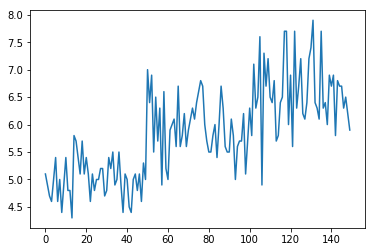

In [53]:
plt.plot(iris[:,0])

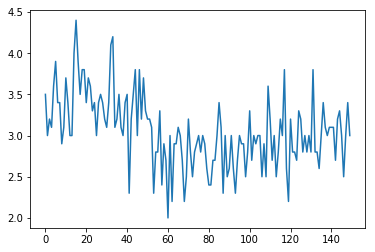

In [54]:
plt.plot(iris[:,1])

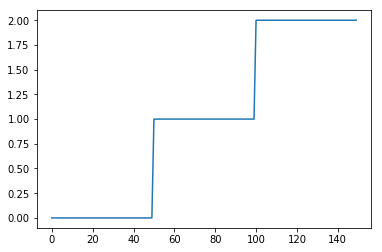

In [55]:
plt.plot(iris[:,-1])

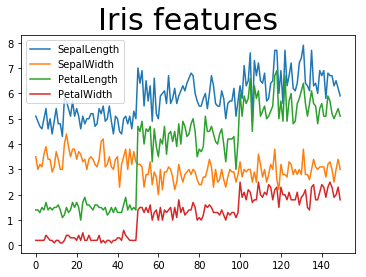

In [24]:
plt.plot(iris[:,0], label='SepalLength')
plt.plot(iris[:,1], label='SepalWidth')
plt.plot(iris[:,2], label='PetalLength')
plt.plot(iris[:,3], label='PetalWidth')

plt.title('Iris features', fontsize=30)
plt.legend()

Text(0,0.5,'PetalWidth')

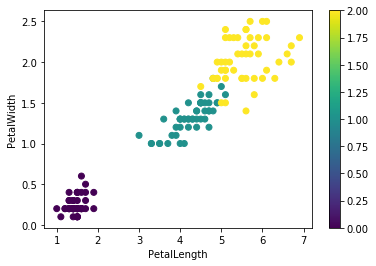

In [26]:
plt.scatter(iris[:,2], iris[:,3], c=iris[:,-1])
plt.colorbar()

plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

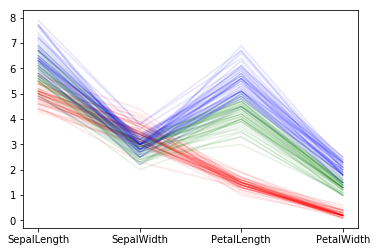

In [68]:
plt.plot(iris[:50,:4].T, 'r-', alpha=0.1)
plt.plot(iris[50:100,:4].T, 'g-', alpha=0.1)
plt.plot(iris[100:,:4].T, 'b-', alpha=0.1)

plt.xticks(range(4),['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
pass